In [1]:
import os
import sys
import pandas as pd

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

import extraction_squares

if operating_system == 'curnagl':
    name_of_variable= pd.read_csv('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/curnagl/DATASETS/variable_list_80_mean.csv')
    path_data = '/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/curnagl/DATASETS'
else:
    name_of_variable= pd.read_csv('data/variable_list_80_mean.csv')
    path_data = 'data'

storm_dates = pd.read_csv('pre_processing/tracks/storm_dates.csv')
path_tracks_1h_EU = 'pre_processing/tracks/ALL_TRACKS/tracks_1h_EU'
path_tracks_1h_non_EU = 'pre_processing/tracks/ALL_TRACKS/tracks_1h_non_EU'
dataset = 'datasets_1h_EU'
dataset_non_EU = 'datasets_1h_non_EU'
#name_of_variables, storm_dates, path_data, path_tracks_1h_EU, dataset


In [12]:
X_train, X_test, X_validation, y_train, y_test, y_validation, y_all_3d_eu = extraction_squares.X_y_datasets_EU(name_of_variable, storm_dates, path_data, path_tracks_1h_EU, dataset, False)
last_step = []

Shape of the X 3D ndarray: (96, 267, 316)
Shape of the y 3D ndarray: (96, 267, 4)
Storm 1 is not continuous, but added.
Storm 2 is continuous.
Storm 3 is continuous.
Storm 4 is continuous.
Storm 5 is continuous.
Storm 6 is continuous.
Storm 7 is not continuous, but added.
Storm 8 is continuous.
Storm 9 is continuous.
Storm 10 is continuous.
Storm 11 is not continuous, but added.
Storm 12 is not continuous, but added.
Storm 13 is continuous.
Storm 14 is continuous.
Storm 15 is not continuous, but added.
Storm 16 is continuous.
Storm 17 is continuous.
Storm 18 is continuous.
Storm 19 is continuous.
Storm 20 is continuous.
Storm 21 is continuous.
Storm 22 is not continuous, but added.
Storm 23 is continuous.
Storm 24 is continuous.
Storm 25 is continuous.
Storm 26 is not continuous, but added.
Storm 27 is continuous.
Storm 28 is continuous.
Storm 29 is not continuous, but added.
Storm 30 is not continuous, but added.
Storm 31 is continuous.
Storm 32 is continuous.
Storm 33 is continuous.


In [13]:
X_train, X_test, X_validation, y_train, y_test, y_validation, y_all_3d_non_eu, last_step = extraction_squares.X_y_datasets_non_EU(name_of_variable, storm_dates, path_data, path_tracks_1h_non_EU, dataset_non_EU, False)

Shape of the X 3D ndarray: (96, 383, 316)
Shape of the y 3D ndarray: (96, 383, 4)
Storm 1 is not continuous, but added.
Storm 2 is not continuous, but added.
Storm 3 is not continuous, but added.
Storm 4 is continuous.
Storm 5 is continuous.
Storm 6 is not continuous, but added.
Storm 7 is not continuous, but added.
Storm 8 is not continuous, but added.
Storm 9 is continuous.
Storm 10 is not continuous, but added.
Storm 11 is not continuous, but added.
Storm 12 is not continuous, but added.
Storm 13 is not continuous, but added.
Storm 14 is not continuous, but added.
Storm 15 is not continuous, but added.
Storm 16 is not continuous, but added.
Storm 17 is not continuous, but added.
Storm 18 is continuous.
Storm 19 is not continuous, but added.
Storm 20 is not continuous, but added.
Storm 21 is not continuous, but added.
Storm 22 is not continuous, but added.
Storm 23 is not continuous, but added.
Storm 24 is empty or caused an error: zero-size array to reduction operation maximum which

In [10]:
import pandas as pd
import numpy as np

def process_storm_data(y_all_3d, y_all_3d_non_eu, number_of_steps_eu, number_of_steps_non_eu):
    """
    Process storm data for both EU and non-EU datasets.

    Parameters:
    - y_all_3d (ndarray): 3D array for EU data.
    - y_all_3d_non_eu (ndarray): 3D array for non-EU data.
    - number_of_steps (int): The number of steps to retain in the processed DataFrame.

    Returns:
    - dict: Processed DataFrames (max, min, mean, std) for EU and non-EU datasets.
    """
    
    def reverse_non_nan(row):
        non_nan_values = row.dropna().values[::-1]
        num_padding = len(row) - len(non_nan_values)
        reversed_padded = np.concatenate([non_nan_values, [np.nan] * num_padding])
        return pd.Series(reversed_padded, index=row.index)
    
    def add_column_first(df, column_name, column_values):
        df[column_name] = column_values
        cols = [column_name] + [col for col in df.columns if col != column_name]
        return df[cols]
    
    def process_single_dataset(y_data, number_of_steps):
        y_max = pd.DataFrame(y_data[:, :, 0])
        y_min = pd.DataFrame(y_data[:, :, 1])
        y_mean = pd.DataFrame(y_data[:, :, 2])
        y_std = pd.DataFrame(y_data[:, :, 3])
        
        # Reverse non-NaN values in each row
        y_max = y_max.apply(reverse_non_nan, axis=1)
        y_min = y_min.apply(reverse_non_nan, axis=1)
        y_mean = y_mean.apply(reverse_non_nan, axis=1)
        y_std = y_std.apply(reverse_non_nan, axis=1)
        
        # Add a 'storm_index' column as the first column
        for df in [y_max, y_min, y_mean, y_std]:
            df['storm_index'] = df.index + 1
            df = add_column_first(df, 'storm_index', df['storm_index'])
        
        # Retain only the specified number of steps (plus storm_index)
        y_max = y_max.iloc[:, :number_of_steps + 1]
        y_min = y_min.iloc[:, :number_of_steps + 1]
        y_mean = y_mean.iloc[:, :number_of_steps + 1]
        y_std = y_std.iloc[:, :number_of_steps + 1]
        
        # Remove rows with NaN values
        y_max = y_max.dropna()
        y_min = y_min.dropna()
        y_mean = y_mean.dropna()
        y_std = y_std.dropna()
        
        return y_max, y_min, y_mean, y_std
    
    # Process both datasets
    eu_results = process_single_dataset(y_all_3d, number_of_steps_eu)
    non_eu_results = process_single_dataset(y_all_3d_non_eu, number_of_steps_non_eu)
    
    return {
        'EU_max': eu_results[0],
        'EU_min': eu_results[1],
        'EU_mean': eu_results[2],
        'EU_std': eu_results[3],
        'non_EU_max': non_eu_results[0],
        'non_EU_min': non_eu_results[1],
        'non_EU_mean': non_eu_results[2],
        'non_EU_std': non_eu_results[3]
    }

In [14]:
# Process storm data

number_of_steps_eu = 15
number_of_steps_non_eu = 36

processed_storm_data = process_storm_data(y_all_3d_eu, y_all_3d_non_eu, number_of_steps_eu, number_of_steps_non_eu)

Storm Training: [1, 3, 3, 4, 6, 7, 8, 10, 12, 13, 14, 15, 17, 17, 19, 21, 22, 23, 24, 26, 26, 29, 30, 30, 31, 33, 37, 37, 39, 40, 40, 42, 42, 45, 47, 49, 51, 54, 55, 56, 58, 59, 61, 61, 65, 67, 68, 69, 73, 75, 77, 79, 80, 82, 82, 84, 85, 86, 86, 88, 89, 89, 92, 93, 95, 95]

Storm Test: [2, 11, 16, 28, 34, 44, 46, 49, 52, 63, 63, 69, 72]

Storm Valid: [8, 20, 35, 48, 52, 54, 65, 71, 74, 76, 78, 80, 92]

Order of the stats : 'max', 'min', 'mean', 'std'

In [4]:
import pandas as pd
import numpy as np

def reverse_non_nan(row):
    # Extract non-NaN values and reverse them
    non_nan_values = row.dropna().values[::-1]
    # Calculate the number of NaNs to pad
    num_padding = len(row) - len(non_nan_values)
    # Pad the reversed values with NaNs at the end
    reversed_padded = np.concatenate([non_nan_values, [np.nan]*num_padding])
    # Return as a Series to maintain DataFrame structure
    return pd.Series(reversed_padded, index=row.index)

# Apply the function to each row of your DataFrame
#df_flipped = df.apply(reverse_non_nan, axis=1)

def add_column_first(df, column_name, column_values):
    """
    Adds a new column to the DataFrame and places it as the first column.

    Parameters:
    - df (pd.DataFrame): The DataFrame to modify.
    - column_name (str): The name of the new column to add.
    - column_values (iterable): The values for the new column.

    Returns:
    - pd.DataFrame: A new DataFrame with the column added in the first position.
    """
    # Add the new column
    df[column_name] = column_values
    # Reorder columns to make the new column the first one
    cols = [column_name] + [col for col in df.columns if col != column_name]
    return df[cols]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# WORKING ON :

work = 'EU'
number_of_steps = 15

y_all_3d_max = pd.DataFrame(y_all_3d[:,:,0])
y_all_3d_min = pd.DataFrame(y_all_3d[:,:,1])
y_all_3d_mean = pd.DataFrame(y_all_3d[:,:,2])
y_all_3d_std = pd.DataFrame(y_all_3d[:,:,3])

y_all_3d_max = pd.DataFrame(y_all_3d[:,:,0])
y_all_3d_min = pd.DataFrame(y_all_3d[:,:,1])
y_all_3d_mean = pd.DataFrame(y_all_3d[:,:,2])
y_all_3d_std = pd.DataFrame(y_all_3d_non_EU[:,:,3])

if work == 'non_EU':

    # Apply the function
    y_all_3d_max_non_eu  = y_all_3d_max.apply(reverse_non_nan, axis=1)
    y_all_3d_min_non_eu  = y_all_3d_min.apply(reverse_non_nan, axis=1)
    y_all_3d_mean_non_eu = y_all_3d_mean.apply(reverse_non_nan, axis=1)
    y_all_3d_std_non_eu  = y_all_3d_std.apply(reverse_non_nan, axis=1)
else:
    y_all_3d_max = y_all_3d_max
    y_all_3d_min = y_all_3d_min
    y_all_3d_mean = y_all_3d_mean
    y_all_3d_std = y_all_3d_std

# Add a column with the storm index
y_all_3d_max['storm_index'] = y_all_3d_max.index+1
y_all_3d_min['storm_index'] = y_all_3d_min.index+1
y_all_3d_mean['storm_index'] = y_all_3d_mean.index+1
y_all_3d_std['storm_index'] = y_all_3d_std.index+1

# Call the function to add a 'storm_index' column
y_all_3d_max = add_column_first(y_all_3d_max, 'storm_index', y_all_3d_max.index + 1)
y_all_3d_min = add_column_first(y_all_3d_min, 'storm_index', y_all_3d_min.index + 1)
y_all_3d_mean = add_column_first(y_all_3d_mean, 'storm_index', y_all_3d_mean.index + 1)
y_all_3d_std = add_column_first(y_all_3d_std, 'storm_index', y_all_3d_std.index + 1)

# Keep only a certain number of steps 
y_all_3d_max = y_all_3d_max.iloc[:,0:number_of_steps+1]
y_all_3d_min = y_all_3d_min.iloc[:,0:number_of_steps+1]
y_all_3d_mean = y_all_3d_mean.iloc[:,0:number_of_steps+1]
y_all_3d_std = y_all_3d_std.iloc[:,0:number_of_steps+1]

# Remove the rows with NaN values
y_all_3d_max = y_all_3d_max.dropna()
y_all_3d_min = y_all_3d_min.dropna()
y_all_3d_mean = y_all_3d_mean.dropna()
y_all_3d_std = y_all_3d_std.dropna()

In [23]:
import pandas as pd
import numpy as np

# Example DataFrame
data = {
    "A": [1, np.nan, 3, 4],
    "B": [np.nan, 2, 3, np.nan],
    "C": [5, 6, np.nan, np.nan],
    "D": [np.nan, np.nan, np.nan, np.nan]
}
df = pd.DataFrame(data)

# Range of values to add
values_to_add = range(1,97)

# Function to add a single value after the last actual value in each row
def add_one_after_last_actual(df, values):
    value_iter = iter(values)  # Create an iterator from the range
    for i, row in df.iterrows():
        last_valid_index = row.last_valid_index()
        if last_valid_index is not None:
            next_index = row.index.get_loc(last_valid_index) + 1
            if next_index < len(row):  # Ensure the next index is within bounds
                try:
                    row.iloc[next_index] = next(value_iter)  # Assign the next value from the range
                except StopIteration:
                    break  # Stop if we've exhausted the range
    return df

# Apply the function
df = add_one_after_last_actual(df, values_to_add)

print(df)

     A    B    C    D
0  1.0  NaN  5.0  1.0
1  NaN  2.0  6.0  2.0
2  3.0  3.0  3.0  NaN
3  4.0  4.0  NaN  NaN


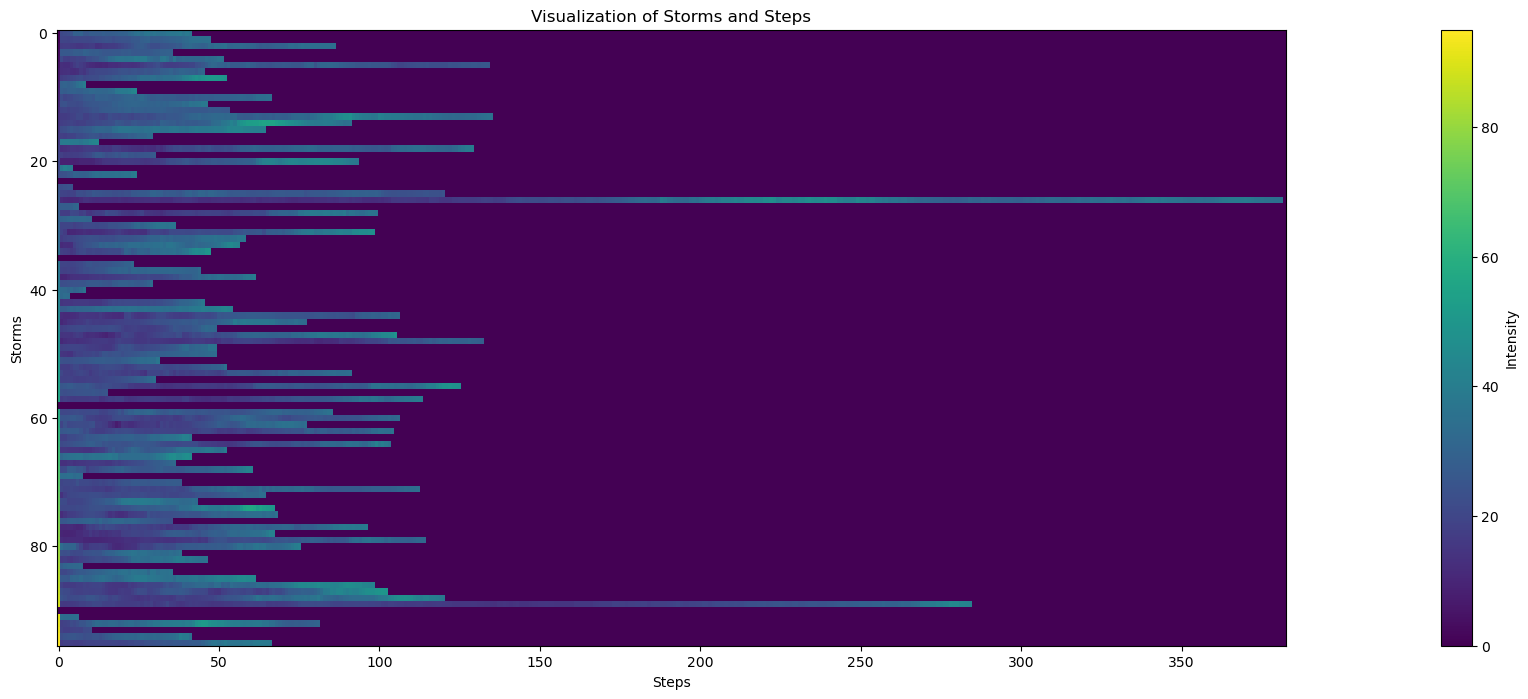

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# WORKING ON :

work = 'non_EU'

y_all_3d_max = y_all_3d[:,:,0]
y_all_3d_min = y_all_3d[:,:,1]
y_all_3d_mean = y_all_3d[:,:,2]
y_all_3d_std = y_all_3d[:,:,3]

if work == 'EU':

    last_step = []

    # add the storm number as a column

    y_all_3d_max_storm = np.concatenate((np.arange(y_all_3d_max.shape[0]).reshape(-1,1), y_all_3d_max), axis=1)
    y_all_3d_min_storm = np.concatenate((np.arange(y_all_3d_min.shape[0]).reshape(-1,1), y_all_3d_min), axis=1)
    y_all_3d_mean_storm = np.concatenate((np.arange(y_all_3d_mean.shape[0]).reshape(-1,1), y_all_3d_mean), axis=1)
    y_all_3d_std_storm = np.concatenate((np.arange(y_all_3d_std.shape[0]).reshape(-1,1), y_all_3d_std), axis=1)

    # transform the 3D array into a 2D array

    #y_all_3d_max = y_all_3d_max_storm.reshape(-1, y_all_3d_max.shape[1])
    #y_all_3d_min = y_all_3d_min.reshape(-1, y_all_3d_min_storm.shape[1])
    #y_all_3d_mean = y_all_3d_mean.reshape(-1, y_all_3d_mean_storm.shape[1])
    #y_all_3d_std = y_all_3d_std.reshape(-1, y_all_3d_std_storm.shape[1])

    # Iterate over each storm's row in y_all_3d_max
    for storm_data in y_all_3d_max:
        if not np.isnan(storm_data).all():  # Ensure the storm has valid data
            # Find the last column index with a non-NaN value
            last_valid_idx = np.where(~np.isnan(storm_data))[0][-1]
            last_step.append(last_valid_idx)  # Append the last step (column index)
            #last_wind_speeds.append(storm_data[last_valid_idx])  # Append the last actual wind speed
        else:
            # Handle cases where all values are NaN
            last_step.append(0)
            #last_wind_speeds.append(None)

        if len(last_step) == y_all_3d_max.shape[0]:
            break

        selected_data_max = [y_all_3d_max_storm[i, :last_step[i]] for i in range(len(last_step))]
        selected_data_min = [y_all_3d_min_storm[i, :last_step[i]] for i in range(len(last_step))]
        selected_data_mean = [y_all_3d_mean_storm[i, :last_step[i]] for i in range(len(last_step))]
        selected_data_std = [y_all_3d_std_storm[i, :last_step[i]] for i in range(len(last_step))]

else:

    y_all_3d_max_storm = np.concatenate((np.arange(y_all_3d_max.shape[0]).reshape(-1,1), y_all_3d_max), axis=1)
    y_all_3d_min_storm = np.concatenate((np.arange(y_all_3d_min.shape[0]).reshape(-1,1), y_all_3d_min), axis=1)
    y_all_3d_mean_storm = np.concatenate((np.arange(y_all_3d_mean.shape[0]).reshape(-1,1), y_all_3d_mean), axis=1)
    y_all_3d_std_storm = np.concatenate((np.arange(y_all_3d_std.shape[0]).reshape(-1,1), y_all_3d_std), axis=1)

    selected_data_max = [y_all_3d_max_storm[i, :last_step[i]] for i in range(len(last_step))]
    selected_data_min = [y_all_3d_min_storm[i, :last_step[i]] for i in range(len(last_step))]
    selected_data_mean = [y_all_3d_mean_storm[i, :last_step[i]] for i in range(len(last_step))]
    selected_data_std = [y_all_3d_std_storm[i, :last_step[i]] for i in range(len(last_step))]

# transform the selected data into a 2D array

selected_data_max_array =np.zeros((len(selected_data_max), max(last_step)+1))
for i in range(len(selected_data_max)):
    selected_data_max_array[i, :last_step[i]] = selected_data_max[i]

selected_data_mean_array =np.zeros((len(selected_data_mean), max(last_step)+1))
for i in range(len(selected_data_mean)):
    selected_data_mean_array[i, :last_step[i]] = selected_data_mean[i]

selected_data_std_array =np.zeros((len(selected_data_std), max(last_step)+1))
for i in range(len(selected_data_std)):
    selected_data_std_array[i, :last_step[i]] = selected_data_std[i]

selected_data_min_array =np.zeros((len(selected_data_min), max(last_step)+1))
for i in range(len(selected_data_min)):
    selected_data_min_array[i, :last_step[i]] = selected_data_min[i]


# plot the wind speed

plt.figure(figsize=(40, 8))
plt.imshow(selected_data_max_array, aspect=2, cmap='viridis')  # Use 'aspect="auto"' to adjust the display
plt.colorbar(label='Intensity')  # Add a colorbar to interpret values
plt.title('Visualization of Storms and Steps')
plt.xlabel('Steps')
plt.ylabel('Storms')
plt.show()

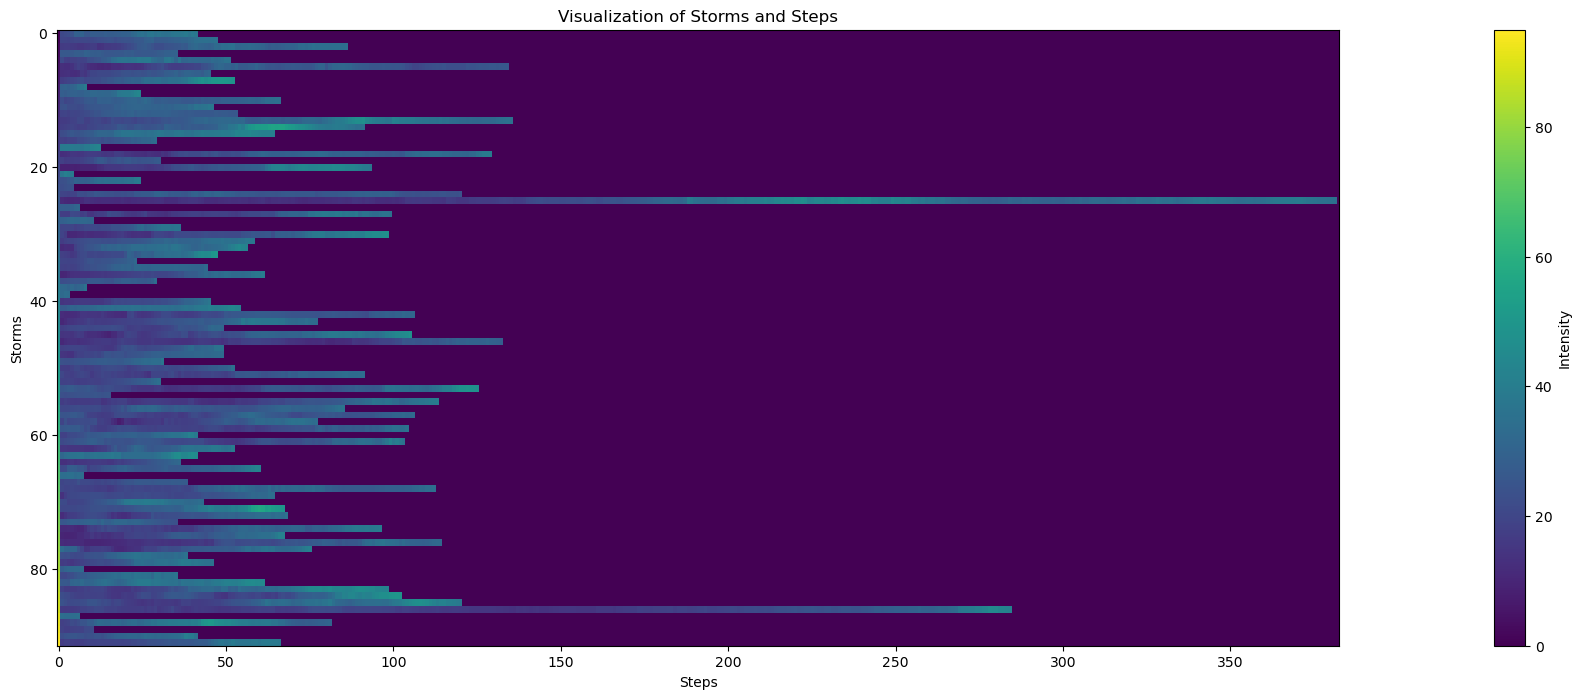

In [5]:
# remove the storms with 0 steps

if work == 'EU' or 'non_EU':
     
    selected_data__max_array_no_0 = selected_data_max_array[selected_data_max_array[:, 1] != 0]
    last_step_no_0 = [step for step in last_step if step != 0]
    selected_data_max_array_no_0 = pd.DataFrame(selected_data__max_array_no_0)
    
    selected_data_mean_array_no_0 = selected_data_mean_array[selected_data_mean_array[:, 1] != 0]
    selected_data_mean_array_no_0 = pd.DataFrame(selected_data_mean_array_no_0)
    
    selected_data_std_array_no_0 = selected_data_std_array[selected_data_std_array[:, 1] != 0]
    selected_data_std_array_no_0 = pd.DataFrame(selected_data_std_array_no_0)
    
    selected_data_min_array_no_0 = selected_data_min_array[selected_data_min_array[:, 1] != 0]
    selected_data_min_array_no_0 = pd.DataFrame(selected_data_min_array_no_0)

else:

    selected_data__max_array_no_0 = selected_data_max_array[selected_data_max_array[:, 0] != 0]
    last_step_no_0 = [step for step in last_step if step != 0]
    selected_data_max_array_no_0 = pd.DataFrame(selected_data__max_array_no_0)

    selected_data_mean_array_no_0 = selected_data_mean_array[selected_data_mean_array[:, 0] != 0]
    selected_data_mean_array_no_0 = pd.DataFrame(selected_data_mean_array_no_0)

    selected_data_std_array_no_0 = selected_data_std_array[selected_data_std_array[:, 0] != 0]
    selected_data_std_array_no_0 = pd.DataFrame(selected_data_std_array_no_0)

    selected_data_min_array_no_0 = selected_data_min_array[selected_data_min_array[:, 0] != 0]
    selected_data_min_array_no_0 = pd.DataFrame(selected_data_min_array_no_0)

# plot the wind speed

plt.figure(figsize=(40, 8))
plt.imshow(selected_data_max_array_no_0, aspect=2, cmap='viridis')  # Use 'aspect="auto"' to adjust the display
plt.colorbar(label='Intensity')  # Add a colorbar to interpret values
plt.title('Visualization of Storms and Steps')
plt.xlabel('Steps')
plt.ylabel('Storms')
plt.show()

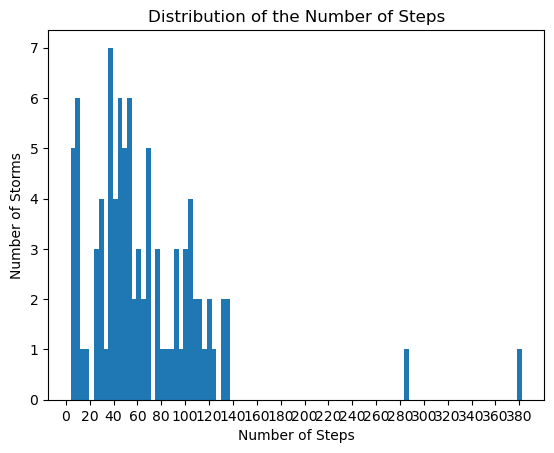

In [6]:
# see the distribution of the number of steps

import math
max_step = math.ceil(max(last_step)/10)*10

plt.hist(last_step_no_0, bins=96)
plt.xlabel('Number of Steps')
plt.xticks(np.arange(0, max_step, 20))
plt.ylabel('Number of Storms')
plt.title('Distribution of the Number of Steps')
plt.show()

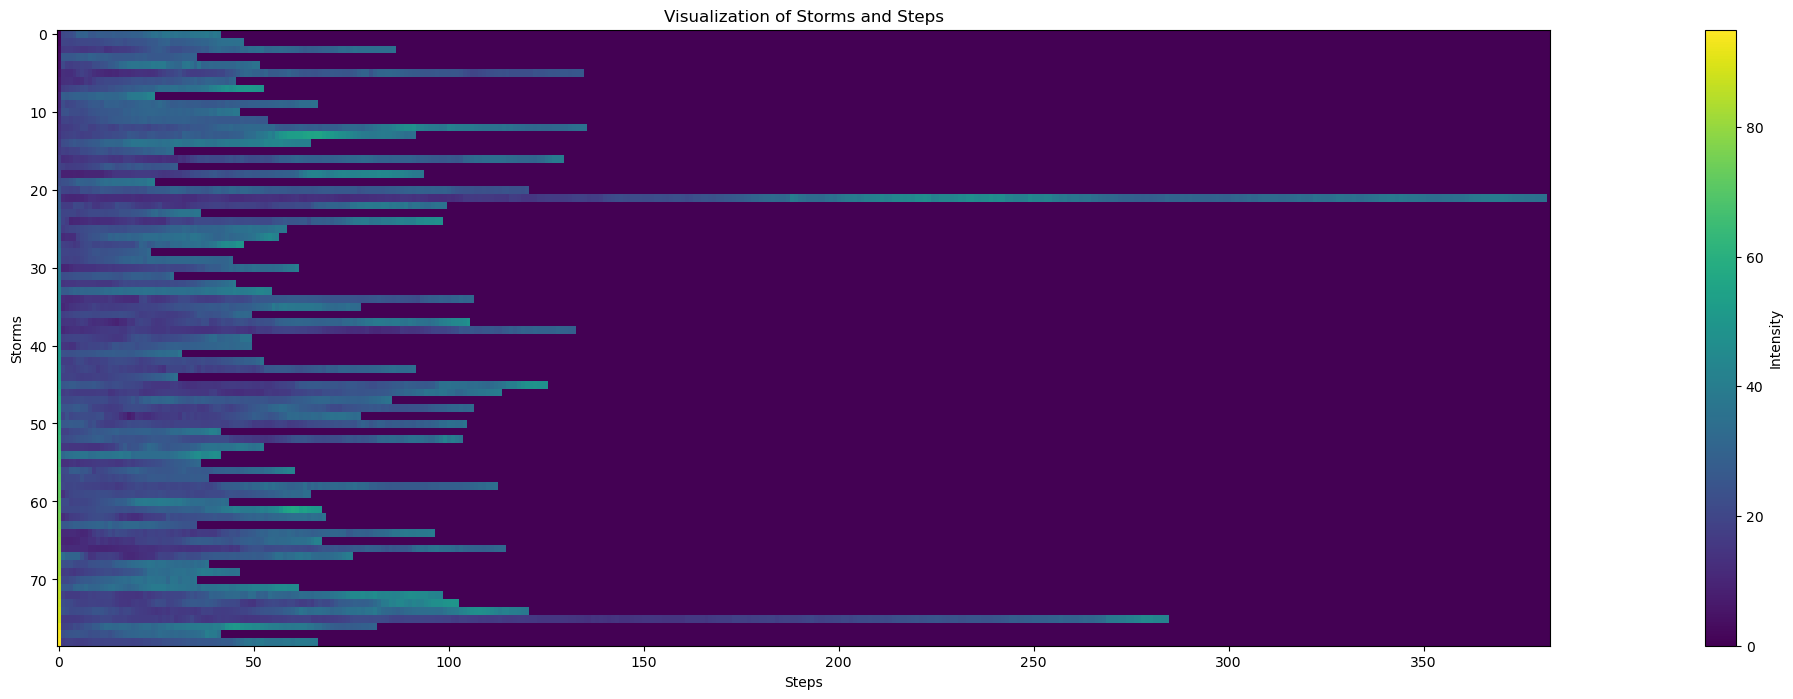

In [7]:
# remove storms with less than 20 steps

#selected_data_array_no_0_no_20 = selected_data_array_no_0[selected_data_array_no_0[:, 0] > 20]
#selected_data_array_no_0_no_20 = pd.DataFrame(selected_data_array_no_0_no_20)
last_step_no_0 = pd.Series(last_step_no_0)
last_step_no_0_no_20_true_false = last_step_no_0 > 20
last_step_no_0_no_20 = last_step_no_0[last_step_no_0 > 20]

selected_data_max_array_no_0_no_20 = selected_data_max_array_no_0[last_step_no_0_no_20_true_false]

selected_data_mean_array_no_0_no_20 = selected_data_mean_array_no_0[last_step_no_0_no_20_true_false]

selected_data_std_array_no_0_no_20 = selected_data_std_array_no_0[last_step_no_0_no_20_true_false]

selected_data_min_array_no_0_no_20 = selected_data_min_array_no_0[last_step_no_0_no_20_true_false]

# plot the wind speed

plt.figure(figsize=(40, 8))
plt.imshow(selected_data_max_array_no_0_no_20, aspect=2, cmap='viridis')  # Use 'aspect="auto"' to adjust the display
plt.colorbar(label='Intensity')  # Add a colorbar to interpret values
plt.title('Visualization of Storms and Steps')
plt.xlabel('Steps')
plt.ylabel('Storms')
plt.show()

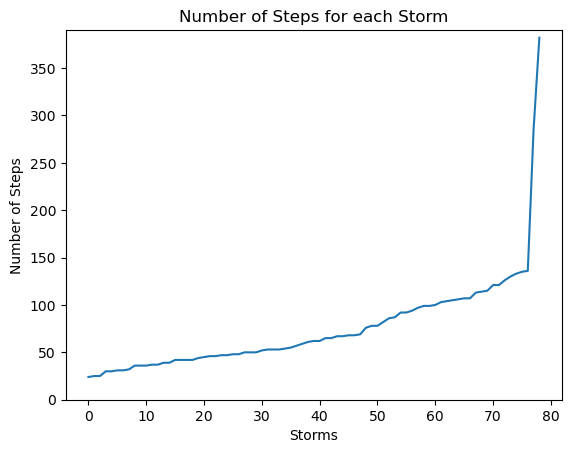

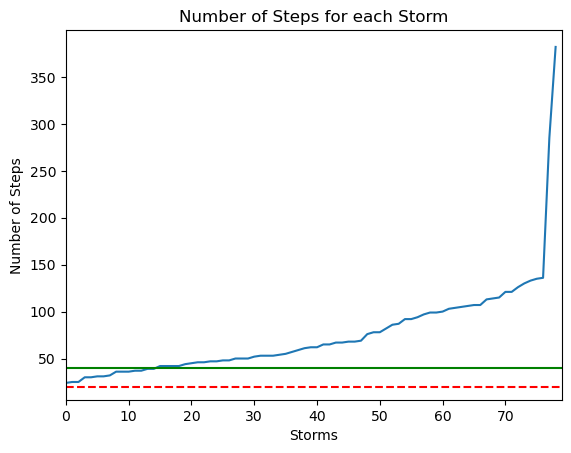

In [8]:
# class the storms by number of steps / rows

#selected_data_array_no_0_no_20_sorted = selected_data_array_no_0_no_20[np.argsort(last_step_no_0_no_20),:]
last_step_no_0_no_20_sorted = np.sort(last_step_no_0_no_20)

# plot the wind speed

'''plt.figure(figsize=(40, 8))
plt.imshow(selected_data_array_no_0_no_20_sorted, aspect=2, cmap='viridis')  # Use 'aspect="auto"' to adjust the display
plt.colorbar(label='Intensity')  # Add a colorbar to interpret values
plt.title('Visualization of Storms and Steps')
plt.xlabel('Steps')
plt.ylabel('Storms')
plt.show()'''

# plot the last step of each storm in function of the storm number

plt.plot(last_step_no_0_no_20_sorted)
plt.xlabel('Storms')
plt.ylabel('Number of Steps')
plt.ylim(0, max_step)
plt.title('Number of Steps for each Storm')
plt.show()

# draw a line at 20 steps

plt.plot(last_step_no_0_no_20_sorted)
plt.axhline(y=20, color='r', linestyle='--')
plt.axhline(y=40, color='g', linestyle='-')
plt.xlabel('Storms')
plt.ylabel('Number of Steps')
plt.xlim(0, len(last_step_no_0_no_20_sorted))
plt.title('Number of Steps for each Storm')
plt.show()

In [9]:
number_of_step_choosen = 36

# take the last 40 steps of each storm in selected_data_array_no_0_no_20 that are not 0

selected_data_max_array_no_0_no_20 = pd.DataFrame(selected_data_max_array_no_0_no_20)
selected_data_mean_array_no_0_no_20 = pd.DataFrame(selected_data_mean_array_no_0_no_20)
selected_data_std_array_no_0_no_20 = pd.DataFrame(selected_data_std_array_no_0_no_20)
selected_data_min_array_no_0_no_20 = pd.DataFrame(selected_data_min_array_no_0_no_20)

# replace the 0 values by NaN
selected_data_max_array_no_0_no_20 = selected_data_max_array_no_0_no_20.replace(0, np.nan)
selected_data_mean_array_no_0_no_20 = selected_data_mean_array_no_0_no_20.replace(0, np.nan)
selected_data_std_array_no_0_no_20 = selected_data_std_array_no_0_no_20.replace(0, np.nan)
selected_data_min_array_no_0_no_20 = selected_data_min_array_no_0_no_20.replace(0, np.nan)

if work == 'non_EU':

    # re add the 0 at the 1st row and 1st column

    selected_data_max_array_no_0_no_20[0][0] = 0
    selected_data_mean_array_no_0_no_20[0][0] = 0
    selected_data_std_array_no_0_no_20[0][0] = 0
    selected_data_min_array_no_0_no_20[0][0] = 0

    #number_of_step_choosen += 1

    # select the last 40 steps of each storm
    #selected_data_max_array_no_0_no_20_40_lasts = selected_data_max_array_no_0_no_20.iloc[:, -number_of_step_choosen:]
    #selected_data_std_array_no_0_no_20_40_lasts = selected_data_std_array_no_0_no_20.iloc[:, -number_of_step_choosen:]
    #selected_data_mean_array_no_0_no_20_40_lasts = selected_data_mean_array_no_0_no_20.iloc[:, -number_of_step_choosen:]
    #selected_data_min_array_no_0_no_20_40_lasts = selected_data_min_array_no_0_no_20.iloc[:, -number_of_step_choosen:]

    # Example: Apply filtering for multiple columns
    filtered_df_max = pd.DataFrame()
    for row in selected_data_max_array_no_0_no_20.iterrows():
        # take the values that are not nan
        row = row[1][row[1].notna()]
        # take the last 40 values
        row = row[-number_of_step_choosen:]
        # reset the index
        row = row.reset_index(drop=True)
        # add the row to the new dataframe
        try:
            filtered_df_max = pd.concat([filtered_df_max, row], axis=1)
        except:
            print('error')#filtered_df = row
    #filtered_df = selected_data_array_no_0_no_20.apply(lambda col: col[col != 0].tail(40), axis=0)

    # remove the columns with less than 40 values or contains nan
    for col in filtered_df_max.columns:
        if filtered_df_max[col].isna().any():
            filtered_df_max.drop(col, axis=1, inplace=True)

    filtered_df_mean = pd.DataFrame()

    for row in selected_data_mean_array_no_0_no_20.iterrows():
        # take the values that are not nan
        row = row[1][row[1].notna()]
        # take the last 40 values
        row = row[-number_of_step_choosen:]
        # reset the index
        row = row.reset_index(drop=True)
        # add the row to the new dataframe
        try:
            filtered_df_mean = pd.concat([filtered_df_mean, row], axis=1)
        except:
            print('error')#filtered_df = row

    for col in filtered_df_mean.columns:
        if filtered_df_mean[col].isna().any():
            filtered_df_mean.drop(col, axis=1, inplace=True)

    filtered_df_std = pd.DataFrame()

    for row in selected_data_std_array_no_0_no_20.iterrows():
        # take the values that are not nan
        row = row[1][row[1].notna()]
        # take the last 40 values
        row = row[-number_of_step_choosen:]
        # reset the index
        row = row.reset_index(drop=True)
        # add the row to the new dataframe
        try:
            filtered_df_std = pd.concat([filtered_df_std, row], axis=1)
        except:
            print('error')#filtered_df = row

    for col in filtered_df_std.columns:
        if filtered_df_std[col].isna().any():
            filtered_df_std.drop(col, axis=1, inplace=True)

    filtered_df_min = pd.DataFrame()
    f = 0
    for row in selected_data_min_array_no_0_no_20.iterrows():
        # take the values that are not nan
        row = row[1][row[1].notna()]
        # take the last 40 values
        row = row[-number_of_step_choosen:]
        # reset the index
        row = row.reset_index(drop=True)
        f += 1
        print(f)
        # add the row to the new dataframe
        #try:
        filtered_df_min = pd.concat([filtered_df_min, row], axis=1)
        #except:
            #print('error')#filtered_df = row

    # add the storm number as a column

    #filtered_df_min['TEST'] = pd.Series(selected_data_min_array_no_0_no_20[0], index=filtered_df_min.index)
    temp = filtered_df_min

    for col in filtered_df_min.columns:
        if filtered_df_min[col].isna().any():
            filtered_df_min.drop(col, axis=1, inplace=True)

    #selected_data_array_no_0_no_20_40_lasts = selected_data_array_no_0_no_20[:, -40:]

    # reshape the data to have the storms in rows and the steps in columns
    filtered_df_max = filtered_df_max.T
    filtered_df_mean = filtered_df_mean.T
    filtered_df_std = filtered_df_std.T
    filtered_df_min = filtered_df_min.T

    # add the storm number as a column



    # save it as a csv file
    #filtered_df_max.to_csv(f'data/data_before_eu_landfall_{number_of_step_choosen}_max.csv', index=False)
    #filtered_df_mean.to_csv(f'data/data_before_eu_landfall_{number_of_step_choosen}_mean.csv', index=False)
    #filtered_df_std.to_csv(f'data/data_before_eu_landfall_{number_of_step_choosen}_std.csv', index=False)
    #filtered_df_min.to_csv(f'data/data_before_eu_landfall_{number_of_step_choosen}_min.csv', index=False)
else:
    number_of_step_choosen += 1

    selected_data_max_array_no_0_no_20_40_firsts = selected_data_max_array_no_0_no_20.iloc[:, :number_of_step_choosen]
    selected_data_std_array_no_0_no_20_40_firsts = selected_data_std_array_no_0_no_20.iloc[:, :number_of_step_choosen]
    selected_data_mean_array_no_0_no_20_40_firsts = selected_data_mean_array_no_0_no_20.iloc[:, :number_of_step_choosen]
    selected_data_min_array_no_0_no_20_40_firsts = selected_data_min_array_no_0_no_20.iloc[:, :number_of_step_choosen]

    # Remove rows with NaN values
    selected_data_max_array_no_0_no_20_40_firsts = selected_data_max_array_no_0_no_20_40_firsts.dropna()
    selected_data_std_array_no_0_no_20_40_firsts = selected_data_std_array_no_0_no_20_40_firsts.dropna()
    selected_data_mean_array_no_0_no_20_40_firsts = selected_data_mean_array_no_0_no_20_40_firsts.dropna()
    selected_data_min_array_no_0_no_20_40_firsts = selected_data_min_array_no_0_no_20_40_firsts.dropna()

    # open storm_dates.csv

    storm_dates = pd.read_csv('pre_processing/tracks/storm_dates.csv')

    # match the start_date of the storms with the storm number written in the selected_data array

    storm_index = selected_data_max_array_no_0_no_20_40_firsts[0] + 1

    storm_dates = storm_dates[storm_dates['storm_index'].isin(storm_index)]

    # add the start_date to the selected_data array in the first column

    selected_data_max_array_no_0_no_20_40_firsts['start_date'] = storm_dates['start_date'].values
    selected_data_mean_array_no_0_no_20_40_firsts['start_date'] = storm_dates['start_date'].values
    selected_data_std_array_no_0_no_20_40_firsts['start_date'] = storm_dates['start_date'].values
    selected_data_min_array_no_0_no_20_40_firsts['start_date'] = storm_dates['start_date'].values

    # replace the storm number by the actual storm index and add the name of the storm

    selected_data_max_array_no_0_no_20_40_firsts['storm_index'] = storm_dates['storm_index'].values
    selected_data_mean_array_no_0_no_20_40_firsts['storm_index'] = storm_dates['storm_index'].values
    selected_data_std_array_no_0_no_20_40_firsts['storm_index'] = storm_dates['storm_index'].values
    selected_data_min_array_no_0_no_20_40_firsts['storm_index'] = storm_dates['storm_index'].values

    selected_data_max_array_no_0_no_20_40_firsts['storm_name'] = storm_dates['name'].values
    selected_data_mean_array_no_0_no_20_40_firsts['storm_name'] = storm_dates['name'].values
    selected_data_std_array_no_0_no_20_40_firsts['storm_name'] = storm_dates['name'].values
    selected_data_min_array_no_0_no_20_40_firsts['storm_name'] = storm_dates['name'].values

    # drop the first column

    selected_data_max_array_no_0_no_20_40_firsts = selected_data_max_array_no_0_no_20_40_firsts.drop(0, axis=1)
    selected_data_mean_array_no_0_no_20_40_firsts = selected_data_mean_array_no_0_no_20_40_firsts.drop(0, axis=1)
    selected_data_std_array_no_0_no_20_40_firsts = selected_data_std_array_no_0_no_20_40_firsts.drop(0, axis=1)
    selected_data_min_array_no_0_no_20_40_firsts = selected_data_min_array_no_0_no_20_40_firsts.drop(0, axis=1)

    # save it as a csv file

    selected_data_max_array_no_0_no_20_40_firsts.to_csv(f'data/data_eu_landfall_{number_of_step_choosen}_max.csv', index=False)
    selected_data_mean_array_no_0_no_20_40_firsts.to_csv(f'data/data_eu_landfall_{number_of_step_choosen}_mean.csv', index=False)
    selected_data_std_array_no_0_no_20_40_firsts.to_csv(f'data/data_eu_landfall_{number_of_step_choosen}_std.csv', index=False)
    selected_data_min_array_no_0_no_20_40_firsts.to_csv(f'data/data_eu_landfall_{number_of_step_choosen}_min.csv', index=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_5630/4100208958.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  selected_data_max_array_no_0_no_20[0][0] = 0
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_5630/4100

In [53]:
SAHCJDV  = pd.DataFrame(selected_data_min_array_no_0_no_20[0]).T